# Data Project

In this project the inequality in Denmark is investigted by plotting lorenz curves and calculating the guini coefficiants. In order to do so, data from Denmark Statistic will be used.

Relevant packages are imported:

In [63]:
import numpy as np
import pandas as pd

import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`

import matplotlib.pyplot as plt

In [64]:
pd.set_option('display.max_rows', 999) # ensures that we can browse through all data

The data loader is set up so that data from Denmark Statistics can be collected. All subjects are listed and as we are interested in the income data, the table from id 04 is chosen.

In [65]:
Dst = pydst.Dst(lang='en') # setup data loader with the langauge 'english'

In [66]:
Dst.get_subjects() 

,id,desc,active,hasSubjects
0,02,Population and elections,True,True
1,05,Living conditions,True,True
2,03,Education and knowledge,True,True
3,18,Culture and National Church,True,True
4,04,"Labour, income and wealth",True,True
5,06,Prices and consumption,True,True
6,14,National accounts and government finances,True,True
7,16,Money and credit market,True,True
8,13,External economy,True,True
9,07,Business sector in general,True,True


In [67]:
tables = Dst.get_tables(subjects=['04']) #selecting table 04
tables

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,AKU100K,Seasonally adjusted labour force status,"1,000 people",2020-02-19 08:00:00,2008Q1,2019Q4,True,"[employment status, time]"
1,AKU101K,Seasonally adjusted labour force status in per...,per cent,2020-02-19 08:00:00,2008Q1,2019Q4,True,"[employment status, time]"
2,AKU110K,Labour force status,"1,000 people",2020-02-19 08:00:00,2008Q1,2019Q4,True,"[employment status, age, sex, time]"
3,AKU111K,Labour force status in percentage,per cent,2020-02-19 08:00:00,2008Q1,2019Q4,True,"[employment status, age, sex, time]"
4,AKU120K,Labour force status,"1,000 people",2020-02-19 08:00:00,2008Q1,2019Q4,True,"[employment status, region, time]"
5,AKU121K,Labour force status in percentage,per cent,2020-02-19 08:00:00,2008Q1,2019Q4,True,"[employment status, region, time]"
6,AKU110A,Labour force status,"1,000 people",2020-02-19 08:00:00,2008,2019,True,"[employment status, age, sex, time]"
7,AKU111A,Labour force status in percentage,per cent,2020-02-19 08:00:00,2008,2019,True,"[employment status, age, sex, time]"
8,AKU130A,Labour force status,"1,000 people",2020-02-19 08:00:00,2008,2019,True,"[employment status, level of education, time]"
9,AKU131A,Labour force status in percentage,per cent,2020-02-19 08:00:00,2008,2019,True,"[employment status, level of education, time]"


The "IFOR31" table is selected

In [68]:
tables[tables.id == 'IFOR31']

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
215,IFOR31,Avg. equivalised disposable Income,DKK,2019-11-13 08:00:00,2000,2018,True,"[decile average, socioeconomic status, time]"


The variables in the dataset are looked at:

In [69]:
avg_disp_inc = Dst.get_variables(table_id='IFOR31')
avg_disp_inc

,id,text,elimination,time,values
0,DECILGEN,decile average,False,False,"[{'id': '1DC', 'text': 'First decil'}, {'id': ..."
1,SOCIO,socioeconomic status,True,False,"[{'id': '100', 'text': 'Total'}, {'id': '111',..."
2,Tid,time,False,True,"[{'id': '2000', 'text': '2000'}, {'id': '2001'..."


Taking a closer look at the values of the variables, as it can't be seen from the above table:

In [70]:
avg_disp_inc = Dst.get_variables(table_id='IFOR31')
for id in ['DECILGEN','SOCIO']:
    print(id)
    values = avg_disp_inc.loc[avg_disp_inc.id == id,['values']].values[0,0]
    for value in values:      
        print(f' id = {value["id"]}, text = {value["text"]}')

DECILGEN
 id = 1DC, text = First decil
 id = 2DC, text = Second decil
 id = 3DC, text = Third decil
 id = 4DC, text = Fourth decil
 id = 5DC, text = Fifth decil
 id = 6DC, text = Sixth decil
 id = 7DC, text = Seventh decil
 id = 8DC, text = Eigth decil
 id = 9DC, text = Ninth decil
 id = 10DC, text = Tenth decil
SOCIO
 id = 100, text = Total
 id = 111, text = Self-employed
 id = 130, text = Employees, total
 id = 131, text = Employees, managers
 id = 132, text = Employees, higher level
 id = 133, text = Employees, medium level
 id = 134, text = Employees, basic level
 id = 135, text = Other employees
 id = 139, text = Employees not further specified
 id = 210, text = Unemployed
 id = 220, text = Temporarily outside the labour force
 id = 310, text = Students
 id = 321, text = Non-oldage pensioners
 id = 322, text = Oldage pensioners
 id = 323, text = Early retirement
 id = 330, text = Recipients of cash benefits
 id = 410, text = Other persons not economically active


All ten deciles are selected and the "total" socio economic status is chosen, as we want to look at inequality amongst the entire population

In [71]:
variables = {'DECILGEN':['*'],'SOCIO':['100'],'TID':['*']}
dec_api = Dst.get_data(table_id = 'IFOR31', variables=variables)
dec_api

,DECILGEN,SOCIO,TID,INDHOLD
0,First decil,Total,2002,65028
1,Second decil,Total,2002,103999
2,Third decil,Total,2002,120236
3,Fourth decil,Total,2002,135871
4,Fifth decil,Total,2002,150513
5,Sixth decil,Total,2002,165005
6,Seventh decil,Total,2002,181053
7,Eigth decil,Total,2002,200865
8,Ninth decil,Total,2002,230367
9,Tenth decil,Total,2002,347627


We want to add an extra column with the deciles written as decimal numbers. A dictionary is created with the strings set as the keys, and the decimals set as the values. Next an empty list named 'new_decil' is created. A for loop is set up to append the values for each string to the list 'new decil'. 

In [72]:
renameDict = {
    'First decil' : 0.1,
    'Second decil' : 0.2,
    'Third decil' : 0.3,
    'Fourth decil' : 0.4,
    'Fifth decil' : 0.5,
    'Sixth decil' : 0.6,
    'Seventh decil' : 0.7,
    'Eigth decil' : 0.8,
    'Ninth decil' : 0.9,
    'Tenth decil' : 1.0,
}

In [73]:
new_decil = []
for i in range(len(dec_api)):
  new_decil.append(renameDict[dec_api['DECILGEN'][i]]) # inside the append() we look up the value for each string. 
                                                       # This value is appended to the empty list named "new decil" 


Now the list is inserted as a collumn in the dataframe. 

In [74]:
dec_api['Decile'] = new_decil # inserting new collumn called 'Decile' which is the list made from above
dec_api.head()

,DECILGEN,SOCIO,TID,INDHOLD,Decile
0,First decil,Total,2002,65028,0.1
1,Second decil,Total,2002,103999,0.2
2,Third decil,Total,2002,120236,0.3
3,Fourth decil,Total,2002,135871,0.4
4,Fifth decil,Total,2002,150513,0.5


The 'SOCIO' variable is removed from the table as it is not needed in the table:

In [75]:
dec_api.drop('SOCIO', axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
dec_api.head()

,DECILGEN,TID,INDHOLD,Decile
0,First decil,2002,65028,0.1
1,Second decil,2002,103999,0.2
2,Third decil,2002,120236,0.3
3,Fourth decil,2002,135871,0.4
4,Fifth decil,2002,150513,0.5


Now we want to sort our data, by grouping into years and then applying a function that sorts the data by the 'decile' column.

In [76]:
dec_api = dec_api.groupby(['TID']).apply(lambda df: df.sort_values('Decile'))
dec_api.reset_index(drop=True, inplace=True)  
dec_api.head()

,DECILGEN,TID,INDHOLD,Decile
0,First decil,2000,61115,0.1
1,Second decil,2000,95540,0.2
2,Third decil,2000,110702,0.3
3,Fourth decil,2000,125646,0.4
4,Fifth decil,2000,139554,0.5


We want to add a column with the aggregated income to our dataframe. This is done by using a function which calculates the cummulative sum. 

In [77]:
dec_api['Aggregated'] = dec_api.groupby(['TID'])['INDHOLD'].cumsum()

In [78]:
dec_api.head(100)

,DECILGEN,TID,INDHOLD,Decile,Aggregated
0,First decil,2000,61115,0.1,61115
1,Second decil,2000,95540,0.2,156655
2,Third decil,2000,110702,0.3,267357
3,Fourth decil,2000,125646,0.4,393003
4,Fifth decil,2000,139554,0.5,532557
5,Sixth decil,2000,153127,0.6,685684
6,Seventh decil,2000,167920,0.7,853604
7,Eigth decil,2000,186069,0.8,1039673
8,Ninth decil,2000,213081,0.9,1252754
9,Tenth decil,2000,329207,1.0,1581961


Now we want to add another column with the accumulated percentage of total income for each decile. A for loop is set up to calculate total income (10th decile) for every year and place it in a dictionary. 

In order to this, an empty dictionary is created, which is called tenthDec. Next every unique element in the column 'TID' is selected, and for this a for loop is set up. It specifies to only look at the rows and columns for the specific year and stores the 'DECILGEN' value  from the 'tenth decil' as index_10thdec. In the last step of the for loop, the value of the row from the collumn 'Aggregate', where time is equal to the specific year and the decile is equal to the 10th decile, is chosen. As it is a for loop, this is repeated for all of the unique years.

In [79]:
tenthDec = {} # empty dictionary
for year in dec_api['TID'].unique(): # unique elements in the column 'TID'
  index_year = dec_api['TID'] == year # looks only at the rows and columns for the specific year
  index_10thdec = dec_api['DECILGEN'] == 'Tenth decil' # selects the 'tenth decil' and calls it index_10thdec 
  tenthDec[year] = dec_api[index_year & index_10thdec]['Aggregated'].values[0] # selects the 'aggregate' value 

print(tenthDec) # taking a look at the values of total income for each year

{2000: 1581961, 2001: 1635646, 2002: 1700564, 2003: 1748382, 2004: 1853158, 2005: 1931333, 2006: 2010280, 2007: 2061329, 2008: 2045947, 2009: 2087654, 2010: 2281252, 2011: 2332661, 2012: 2394813, 2013: 2465914, 2014: 2518893, 2015: 2591198, 2016: 2632459, 2017: 2708650, 2018: 2772411}


Now a for loop is set up to calculate the cumulative percentage of total income. First an array is created, which has the same amount of entries as the amount of rows in the dataframe. Next the for loop is set up which instructs to look at the value in 'TID' for the 'i' row, and stores it as year. In the last step of the for loop, the cumulative percentage of total income is calculated. This is done by selecting the value from the column 'aggregated' in the specific 'i' row and dividing it by the total income of that specific year, and multiplying it with 100. 

In [93]:
new_col = np.empty(len(dec_api)) # Creating an array
for i in range(len(new_col)):
  year = dec_api['TID'][i] # Getting the year in that row
  new_col[i] = 100*(dec_api['Aggregated'][i] / tenthDec[year]) # Calculating cumulative percentage of income

Adding a new column to the dataframe with the accumulated percentages.

In [94]:
dec_api['AccumulatedPercentage'] = new_col

In [95]:
dec_api 

,DECILGEN,TID,INDHOLD,Decile,Aggregated,AccumulatedPercentage
0,First decil,2000,61115,0.1,61115,3.863243
1,Second decil,2000,95540,0.2,156655,9.902583
2,Third decil,2000,110702,0.3,267357,16.900353
3,Fourth decil,2000,125646,0.4,393003,24.842774
4,Fifth decil,2000,139554,0.5,532557,33.664357
5,Sixth decil,2000,153127,0.6,685684,43.343926
6,Seventh decil,2000,167920,0.7,853604,53.958599
7,Eigth decil,2000,186069,0.8,1039673,65.720520
8,Ninth decil,2000,213081,0.9,1252754,79.189942
9,Tenth decil,2000,329207,1.0,1581961,100.000000


The data is now ready, and the Lorenz curve can be plotted. We are going to compare the graph from 2000 with the graph from 2018.

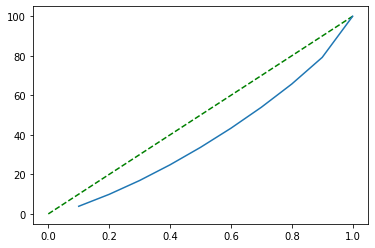

In [96]:
year = 2000 # selecting the year
plt.plot([0,1], [0,100], 'g--') # plotting a 45 degree curve
plt.plot(dec_api[dec_api['TID'] == year]['Decile'], dec_api[dec_api['TID'] == year]['AccumulatedPercentage']) # The deciles are ploted against the accumulated percentage
plt.show()

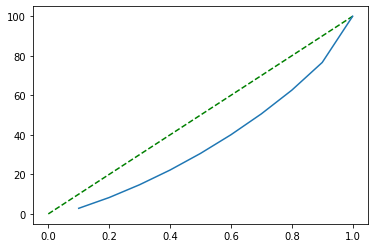

In [97]:
year = 2018 # selecting the year
plt.plot([0,1], [0,100], 'g--') # plotting a 45 degree curve
plt.plot(dec_api[dec_api['TID'] == year]['Decile'], dec_api[dec_api['TID'] == year]['AccumulatedPercentage']) # The deciles are ploted against the accumulated percentage
plt.show()

We will now calculate the gini coefficient, which is equal to the area between the 45 degree curve and the lorenz curve

In [98]:
perf_area = 0.5*1*100 # calculating the area underneath the 45-degree line
perf_area

50.0

A function is used to calculates the area underneath the lorenz curves. Then the  guini coefficient is calculated by subtracting the value of the area underneath lorenz curve, from the area underneath the 45-degree line and dividing by this area.

In [99]:
year = 2000 # selecting the year
area_under_curve = np.trapz(dec_api[dec_api['TID'] == year]['AccumulatedPercentage'], dec_api[dec_api['TID'] == year]['Decile'])
(perf_area - area_under_curve)/perf_area # calculates guini coefficient

0.24109064635601002

In [100]:
year = 2018  # selecting the year
area_under_curve = np.trapz(dec_api[dec_api['TID'] == year]['AccumulatedPercentage'], dec_api[dec_api['TID'] == year]['Decile'])
(perf_area - area_under_curve)/perf_area # calculates guini coefficient

0.28573483513086617

Calculating the change in the guini coefficient:

In [101]:
0.28573483513086617 - 0.24109064635601002

0.04464418877485615

From the two figures we can see that in the period 2000 - 2018 inequality in Denmark has increased as it apears that the area between the two curves has become slightly larger. The Guini coefficient also confirms this, as it has increased in 2018 with roughly 0.0446.